In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("75972720-b261-45a5-aa85-84a6773fa937.csv",sep = ";")


In [3]:
data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,3,0,SQUID_INK,1820.0,1.0,1819.0,28.0,NaN,NaN,1822,28,NaN,NaN,NaN,NaN,1821.0,0.000000
1,3,0,VOLCANIC_ROCK_VOUCHER_10000,182.0,17.0,NaN,NaN,NaN,NaN,183,17,NaN,NaN,NaN,NaN,182.5,0.000000
2,3,0,KELP,2040.0,29.0,NaN,NaN,NaN,NaN,2043,28,NaN,NaN,NaN,NaN,2041.5,0.000000
3,3,0,RAINFOREST_RESIN,9992.0,26.0,NaN,NaN,NaN,NaN,10008,26,NaN,NaN,NaN,NaN,10000.0,0.000000
4,3,0,VOLCANIC_ROCK_VOUCHER_10250,36.0,17.0,NaN,NaN,NaN,NaN,37,17,NaN,NaN,NaN,NaN,36.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3,99900,PICNIC_BASKET2,30056.0,1.0,30055.0,39.0,NaN,NaN,30061,1,30062.0,39.0,NaN,NaN,30058.5,323.000000
14996,3,99900,VOLCANIC_ROCK_VOUCHER_10500,3.0,13.0,NaN,NaN,NaN,NaN,4,13,NaN,NaN,NaN,NaN,3.5,0.000000
14997,3,99900,RAINFOREST_RESIN,9992.0,27.0,NaN,NaN,NaN,NaN,10008,27,NaN,NaN,NaN,NaN,10000.0,2392.000000
14998,3,99900,VOLCANIC_ROCK_VOUCHER_10000,189.0,13.0,NaN,NaN,NaN,NaN,190,13,NaN,NaN,NaN,NaN,189.5,3603.640625


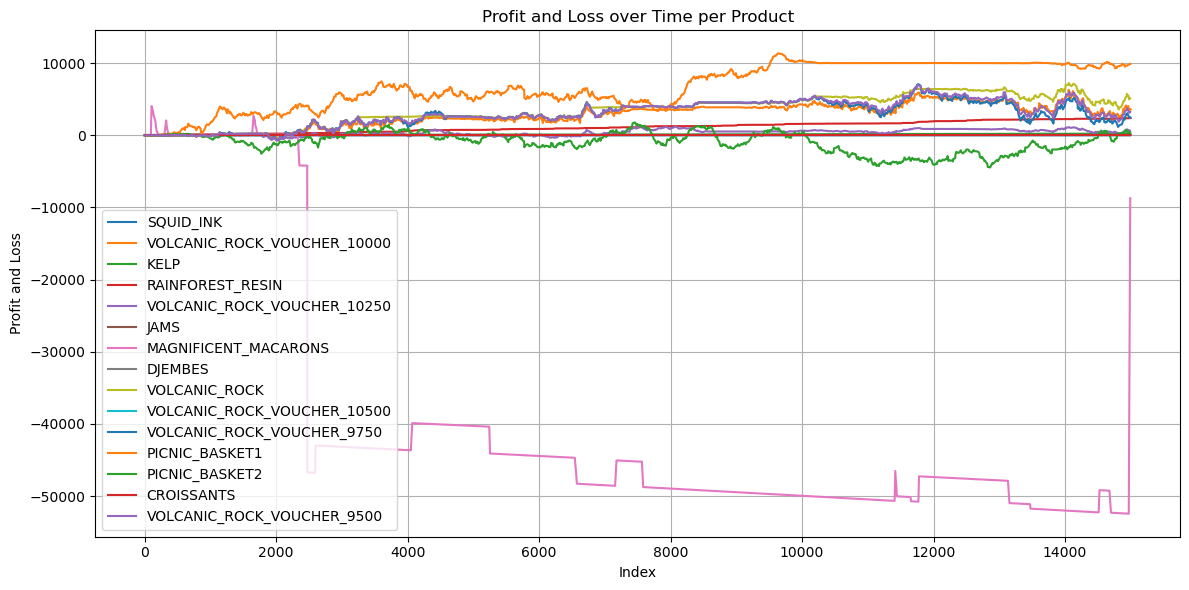

In [6]:
plt.figure(figsize=(12,6))
for prod in data["product"].unique():
    filtered = data[data["product"] == prod]
    plt.plot(filtered["profit_and_loss"], label=prod)
plt.xlabel("Index")
plt.ylabel("Profit and Loss")
plt.title("Profit and Loss over Time per Product")
plt.legend()
plt.grid(True)
plt.tight_layout()


In [ ]:
data